In [2]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download latest version
path = kagglehub.dataset_download("rakannimer/air-passengers")

df = pd.read_csv(os.path.join(path, os.listdir(path)[0]), header=0, index_col=0, parse_dates=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Lagging: Lagging consists of creating features using previous values of the time series. For example, to predict  𝑋𝑡
 , we can use  𝑋𝑡−1
  and  𝑋𝑡−2
  as explanatory variables.

Example: To predict the number of passengers for the current month, you can include the sales from the previous two months as features.

In [3]:
df['Passengers_lag1'] = df['#Passengers'].shift(1)
df.head()


,#Passengers,Passengers_lag1
Month,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


Rolling windows: Rolling windows involve using moving averages or sums over a given period. This helps capture local trends over a specific period.

Example: The average number of air passengers over the last three months can be used to forecast the future value to take into account seasonal variations.

In [4]:
df['Passengers_MA_3months'] = df['#Passengers'].rolling(window=3).mean()
df.head()


,#Passengers,Passengers_lag1,Passengers_MA_3months
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,NaN
1949-03-01,132,118.0,120.666667
1949-04-01,129,132.0,126.333333
1949-05-01,121,129.0,127.333333


In [5]:
df = df.dropna()
df.head()


,#Passengers,Passengers_lag1,Passengers_MA_3months
Month,,,
1949-03-01,132,118.0,120.666667
1949-04-01,129,132.0,126.333333
1949-05-01,121,129.0,127.333333
1949-06-01,135,121.0,128.333333
1949-07-01,148,135.0,134.666667


Exogenous variables: It is often useful to include external (exogenous) variables that can influence the time series. For example, holidays or the number of public holidays each month can be used to forecast the number of air passengers.

In [6]:

X = df[['Passengers_lag1']]
y = df['#Passengers']

Two methods are commonly used for data separation:

The hold-out method for train-test splitting is a simple technique for dividing time series data. It involves separating the data into two parts: the older data is used as the training set, and the more recent data as the test set. This approach is particularly important for time series, as it respects chronological order: past data is used to predict future values. This allows evaluating the model in a realistic context where only past data is available at the time of prediction. For example, here we could use data from 1949 to 1959 for training and data from 1960 for testing.

The Time Series Split method, a cross-validation technique designed for time series, where the chronological order of data is crucial. Unlike classical cross-validation methods, it respects temporal order by progressively and sequentially dividing the data. At each split, an additional portion of past data is added to the training set, and future data is used for testing. This allows evaluating model performance realistically, using only data available up to the time of prediction and testing on subsequent periods.

In [7]:
X_train = X.iloc[:-24]
X_test = X.iloc[-24:]

y_train = y.iloc[:-24]
y_test = y.iloc[-24:]

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
print(f'Erreur quadratique moyenne (RMSE) : {rmse}')

Erreur quadratique moyenne (RMSE) : 2672.490893563275


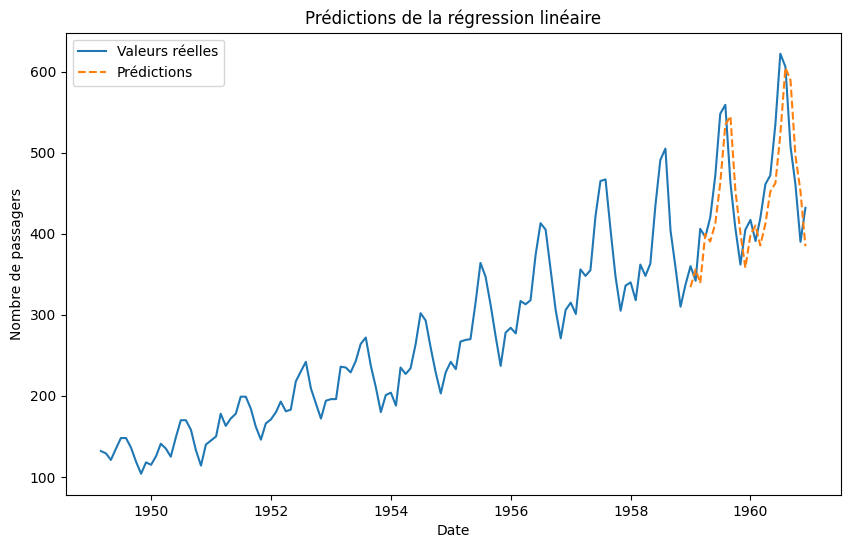

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Valeurs réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', linestyle='--')
plt.title('Prédictions de la régression linéaire')
plt.xlabel('Date')
plt.ylabel('Nombre de passagers')
plt.legend()
plt.show()